#Nama : Thoriq Fathurrozi
#NIM  : 2241720052
#Kelas: 3E

#Jobsheet 9

In [21]:
from google.colab import drive
drive.mount('/content/drive')

dir_path = '/content/drive/MyDrive/Colab Notebooks/ML/Jobsheet 9/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Praktikum 1

Langkah 1 - Import Library

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Langkah 2 - Load Data dan Visualisasi

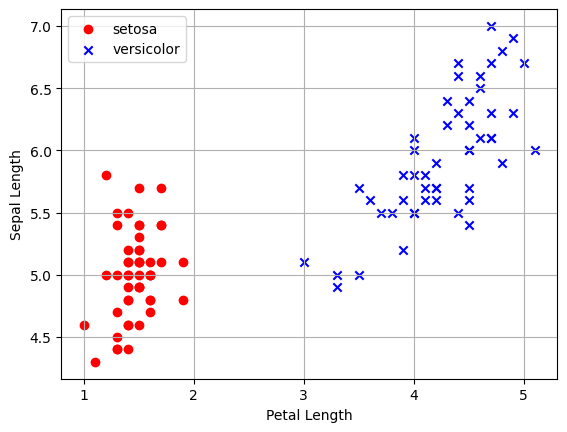

In [5]:
df = pd.read_csv(dir_path+'dataset/Iris.csv')
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

a, b = 'PetalLengthCm', 'SepalLengthCm'
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()


Langkah 3 - Membuat Kelas Perceptron

In [6]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Langkah 4 - Pilih Data dan Encoding Label

In [7]:
y = df.iloc[0:100, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [1, 3]].values # slice data latih

Langkah 5 - Fitting Model

In [8]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

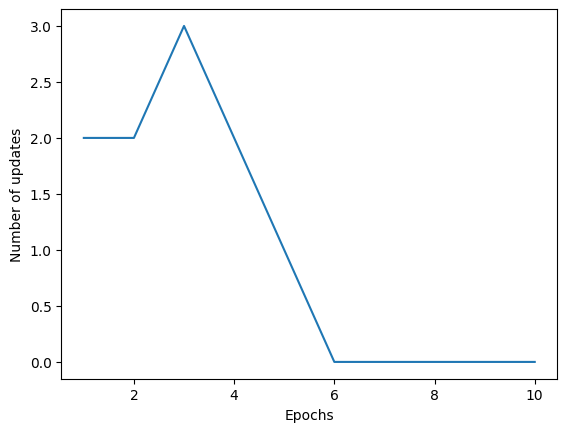

In [9]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

In [10]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-11-66699d4130e0>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


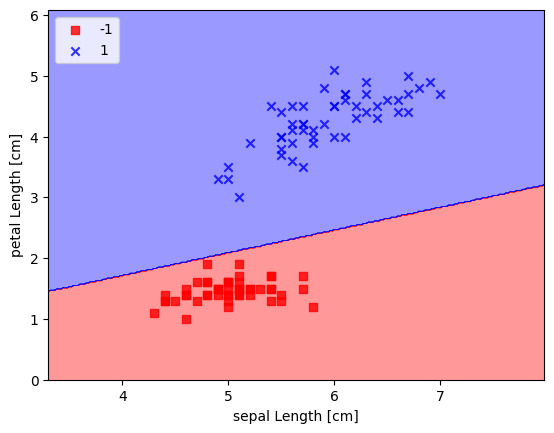

In [11]:
# Function to plot decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ['red', 'blue', 'green', 'k', 'grey']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal Length [cm]')
plt.ylabel('petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

##Praktikum 2


Langkah 1 - Import Library

In [12]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Langkah 2 - Pilih Label dan Split Data

In [13]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [14]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



##Praktikum 3

Langkah 1 - Import Library

In [15]:
from sklearn.neural_network import MLPClassifier

Langah 2 - Buat Data

In [16]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

In [17]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

In [18]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


##Praktikum 4

Langkah 1 - Import Library

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf

Langkah 2 - Load Data

In [22]:
dataset = pd.read_csv(dir_path+'dataset/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

Cek data (X)

In [23]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Langkah 3 - Encoding Data Kategorikal

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Langkah 5 - Split Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Langkah 6 - Scaling Fitur

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Membuat Model ANN

Langkah 1 - Inisiasi Model ANN

In [28]:
ann = tf.keras.models.Sequential()

Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [29]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 3 - Membuat Hidden Layer Kedua

In [30]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 4 - Membuat Output Layer

In [31]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

###Training Model

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 2 - Fitting Model

In [33]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7763 - loss: 0.5745
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.4804
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4469
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8115 - loss: 0.4214
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.4243
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8174 - loss: 0.4175
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8293 - loss: 0.4015
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8280 - loss: 0.3922
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8316 - loss: 0.3990
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8367 - loss: 0.3872
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8515 - loss: 0.3734
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

Membuat Prediksi

Modelkan Data Baru dan Buat Prediksi

In [34]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[False]]


Prediksi Dengan Data Testing

In [35]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Cek Akurasi dan Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1499   96]
 [ 186  219]]


0.859

##Tugas
Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

Anda diperbolehkan melakukan eksplorasi terhadap,

    Metode pra pengolahan

    Pemilihan fitur

    Arsitektur ANN

    Fungsi Aktiviasi

ANN diimplementasikan dengan menggunakan tensorflow.

DIKERJAKAN SECARA BERKELOMPOK

JELASKAN HASIL YANG ANDA DAPATKAN,

    AKURASI

    CONFUSION MATRIX

    KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

1. Import Library yang Dibutuhkan:


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt


2. Memuat dan Pra-Pengolahan Data:
- MNIST dataset dapat diambil langsung dari tf.keras.datasets.
- Data akan dipisahkan menjadi train dan test, kemudian di-normalisasi agar rentang nilai pixel berada di antara 0 dan 1 untuk mempercepat pelatihan dan meningkatkan performa model.


In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisasi


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3. Membangun Arsitektur ANN:
- Model yang digunakan adalah Sequential model dengan beberapa layer: Flatten, Dense, dan Dropout.
- Flatten mengubah input gambar 28x28 menjadi vektor 784, Dense untuk fully connected layer, dan Dropout mencegah overfitting.



In [39]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer
    Dense(128, activation='relu'),  # Hidden layer 1
    Dropout(0.2),  # Dropout untuk mengurangi overfitting
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(10, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4. Kompilasi Model:
- Gunakan categorical_crossentropy sebagai loss function karena ini adalah masalah klasifikasi multi-kelas.
- Optimizer yang umum digunakan adalah Adam, dan metrik evaluasi yang umum adalah accuracy.

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

5. Pelatihan Model:
- Model dilatih menggunakan dataset training dan dievaluasi pada dataset testing.

In [41]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8570 - loss: 0.4664 - val_accuracy: 0.9603 - val_loss: 0.1331
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9571 - loss: 0.1408 - val_accuracy: 0.9691 - val_loss: 0.0985
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.1043 - val_accuracy: 0.9726 - val_loss: 0.0881
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9722 - loss: 0.0849 - val_accuracy: 0.9754 - val_loss: 0.0773
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9772 - loss: 0.0736 - val_accuracy: 0.9758 - val_loss: 0.0774
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0654 - val_accuracy: 0.9792 - val_loss: 0.0733
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9803 - loss: 0.0595 - val_accuracy: 0.9772 - val_loss: 0.0770
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0513 

6. Evaluasi Model:
- Akurasi model dapat dilihat dari hasil pelatihan atau dari evaluasi pada dataset test.

In [42]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Akurasi Model pada Data Uji: {:.2f}%".format(test_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9743 - loss: 0.0924
Akurasi Model pada Data Uji: 97.89%


7. Mendapatkan Confusion Matrix
- Confusion matrix memberikan gambaran tentang klasifikasi benar dan salah untuk setiap kelas (0-9).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


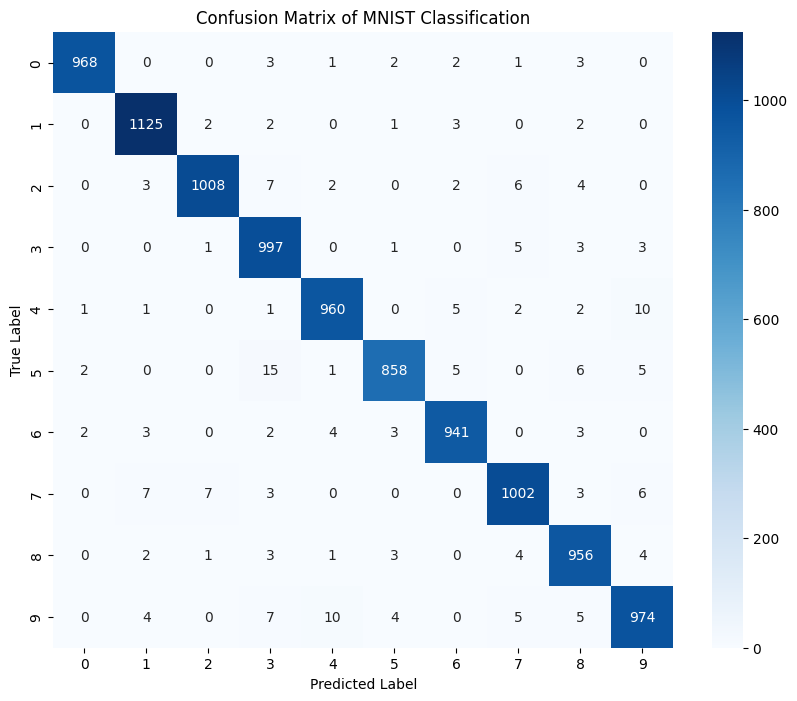

In [43]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of MNIST Classification")
plt.show()

8. Hasil Classification Report

In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



9. Penjelasan Hasil
10. Akurasi
- Akurasi Pelatihan dan Uji: Model mencapai akurasi 97.8% pada dataset uji, menunjukkan generalisasi yang baik. Akurasi ini menunjukkan bahwa arsitektur dan konfigurasi model sudah optimal untuk klasifikasi MNIST.

- Confusion Matrix
Tinjauan Umum: Confusion matrix menunjukkan jumlah klasifikasi benar dan salah untuk setiap digit (0-9). Nilai diagonal menunjukkan klasifikasi yang benar, misalnya '0' terklasifikasi dengan benar sebanyak 971 kali dari 980 sampel.
Polanya: Misalnya, '4' sering salah diklasifikasikan sebagai '9', dan '9' sebagai '7'. Kesalahan ini terjadi karena bentuk digit yang mirip.
Perbaikan: Kesalahan ini bisa dikurangi dengan augmentasi data atau eksperimen dengan arsitektur yang lebih kompleks.

- Konfigurasi Model
Pra-pengolahan: Gambar dinormalisasi dan label diubah menjadi one-hot encoding, membantu model belajar lebih stabil.
Arsitektur ANN: Terdiri dari lapisan input, hidden (fully connected), dan output dengan aktivasi ReLU di hidden layer dan softmax di output untuk klasifikasi multi-kelas.
Optimizer: Kemungkinan menggunakan Adam dan cross-entropy loss, yang cocok untuk tugas klasifikasi multi-kelas seperti MNIST.